Task 3 - Iris Flower Classification

In [1]:
import numpy as np
import pandas as pd

In [2]:
df_iris = pd.read_csv('iris.csv')
df_iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
# Checking if the data has null values.
df_iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [4]:
# Analysis of the data.
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [22]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
# Visualise the dataset.
# Import required libraries.
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [11]:
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

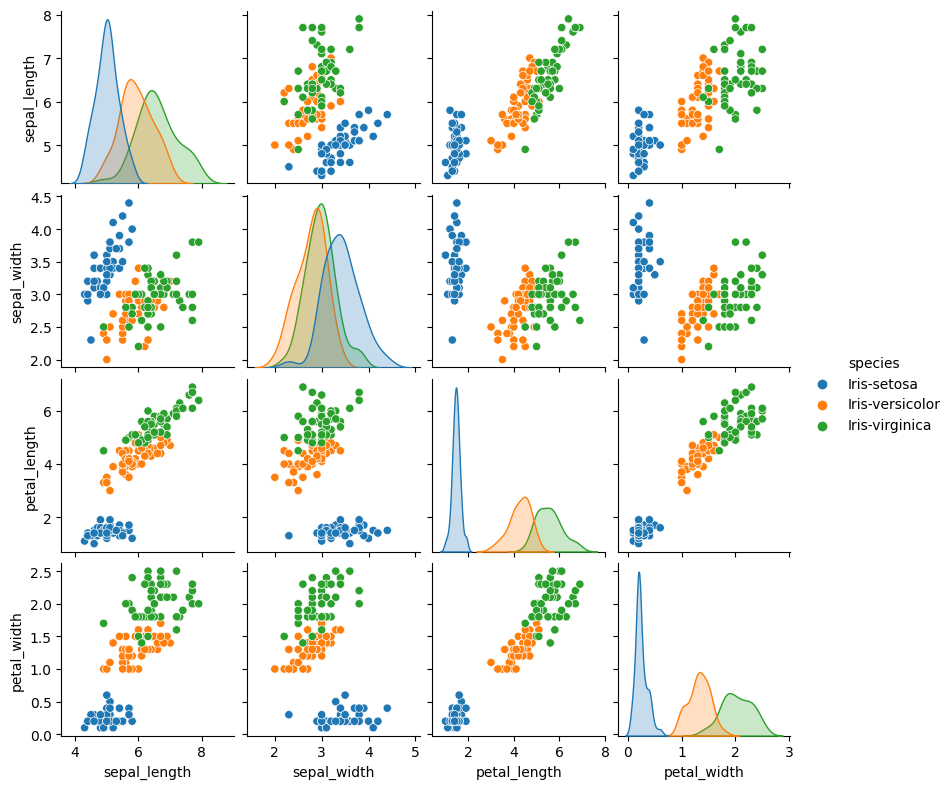

In [14]:
sns.pairplot(df_iris, hue = "species", height = 2)

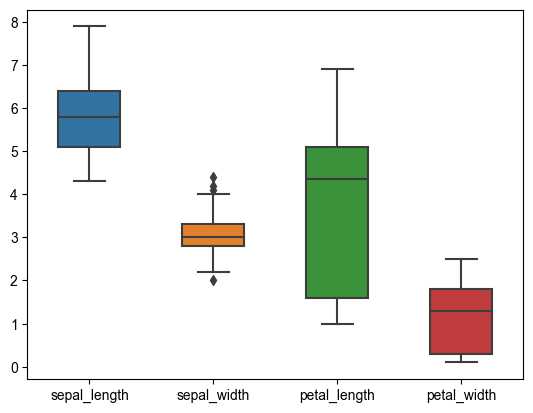

In [31]:
sns.boxplot(data = df_iris, width = 0.5, fliersize = 5)
sns.set(rc={'figure.figsize':(2,15)})

In [32]:
# Removing outliers from sepal width.
q1 = df_iris['sepal_width'].quantile(0.25)
q3 = df_iris['sepal_width'].quantile(0.75)
iqr = q3 - q1
df = df_iris[(df_iris['sepal_width'] >= q1 - 1.5 * iqr) & (df_iris['sepal_width'] <= q3 + 1.5 * iqr)]
df.shape

(146, 5)

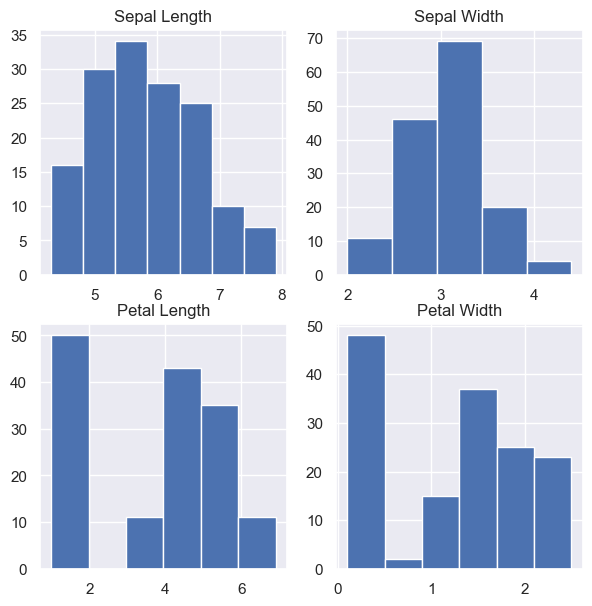

In [33]:
fig, axes = plt.subplots(2, 2, figsize = (7,7))

axes[0,0].set_title("Sepal Length")
axes[0,0].hist(df_iris['sepal_length'], bins = 7)

axes[0,1].set_title("Sepal Width")
axes[0,1].hist(df_iris['sepal_width'], bins = 5);

axes[1,0].set_title("Petal Length")
axes[1,0].hist(df_iris['petal_length'], bins = 6);

axes[1,1].set_title("Petal Width")
axes[1,1].hist(df_iris['petal_width'], bins = 6);

In [16]:
from sklearn.model_selection import train_test_split
X = df_iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df_iris['species']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [18]:
# Import required libraries.
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [19]:
# Decision Tree Model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)
dt_accuracy = ((dt_y_pred == y_test).mean()) * 100
print('Decision Tree accuracy: {:0.2f}%'.format(dt_accuracy))

Decision Tree accuracy: 94.74%


In [20]:
# Support Vector Machine Model
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_y_pred = svm_model.predict(X_test)
svm_accuracy = ((svm_y_pred == y_test).mean()) * 100
print('SVM accuracy: {:0.2f}%'.format(svm_accuracy))

SVM accuracy: 94.74%


In [21]:
# K-Nearest Neighbors Model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_y_pred = knn_model.predict(X_test)
knn_accuracy = ((knn_y_pred == y_test).mean()) * 100
print('KNN accuracy: {:0.2f}%'.format(knn_accuracy))

KNN accuracy: 94.74%
